######The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Energy Dispersing Air Bag Landing Systems

<p><a href="http://commons.wikimedia.org/wiki/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg#/media/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg/1200px-thumbnail.jpg" alt="A pallet loaded with heavy cargo is airdropped from a C-130 Hercules aircraft during tactical airdrop training flight for members of the 345th Tactical Airlift Squadron DF-ST-91-10084.jpg"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg#/media/File:A_pallet_loaded_with_heavy_cargo_is_airdropped_from_a_C-130_Hercules_aircraft_during_tactical_airdrop_training_flight_for_members_of_the_345th_Tactical_Airlift_Squadron_DF-ST-91-10084.jpg">A pallet loaded with heavy cargo is airdropped from a C-130 Hercules aircraft during tactical airdrop training flight for members of the 345th Tactical Airlift Squadron DF-ST-91-10084</a>" by Tech. Sgt. James R. Ferguson - <a rel="nofollow" class="external free" href="http://www.defenseimagery.mil/imageRetrieve.action?guid=1f916304399ca162bfaf704e192b4d085b093844&amp;t=2">http://www.defenseimagery.mil/imageRetrieve.action?guid=1f916304399ca162bfaf704e192b4d085b093844&amp;t=2</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.</p>

In [1]:
#Initializations
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

## Air Bag Landing Systems


<div style="float: right;">
<img style="margin: 20px; width: 200px;" src="./images/AirBag03.png" />
<br>
<img style="margin: 20px; width: 200px;" src="./images/AirBag04.jpg"/>
<br>
<img style="width: 200px;" src="./images/AirBag01.png" />
<br>
<img style="width: 200px;" src="./images/AirBag05.png" />
</div>
Air bag landing systems have been adapted to a wide range of uses including space vehicle recovery, planetary exploration, humanitarian supply missions, and field delivery of military supplies. The purpose of the airbags is to dissipate the landing energy and thereby safely and securely deliver cargo to the ground.  A typical mission profile is shown in the following diagram (Figure 1 from Wen, et. al, 2010).

The air bags are stored in a folded position underneath a payload platform. Upon exiting the aircraft, the parachute deploys and the air bags arefilled by ram air entering through a one-way vent. After initial contact with the ground, the lower vent closes and bag pressure builds due to the payload momentum. A membrane covering the upper vent bursts at a pre-determined pressure after which the airbag continues to collapse until the payload finally and safely touches down. [This](http://www.combatreform.org/T-21.htm) image shows deployment of Russian towed artillary piece.

A typical airbag design for delivering military cargo is shown in these figures (courtesy of Duramold, Inc.). In this configuration, the airbags are constructed in pairs, and two pairs (a total of four airbags) are installed beneath each 2 feet by nine feet section of a segmented payload platform. A typical platorm (Type V platform manufactured by Airlift Technologies, Inc.) is shown in the accompanying figure.

Typical operating parameters:

* Parachute descent velocity: 28 ft/sec
* Loading: 2000-4000 lbs per 2 foot segment, with a maximum loading of 250 lb/sq. ft. 
* Maximum g-force: 8g
* No bouncing

## Analysis

This is a preliminary analysis to obtain an approximate model for the design analysis of an air bag system. For this purpose, the assumptions include ideal operation of all components, an airbag system of constant cross-sectional area, non-elastic materials, and the ideal gas law.

#### Dimensions

The dimensions of a typical airbag are taken from drawings provided by Duramold, Inc.

In [3]:
import math
PI = math.pi

from pint import UnitRegistry
ur = UnitRegistry()

R = 8.314 * ur.J/(ur.mol*ur.degK)
MW = 28.966 * ur.grams/ur.mol

In [4]:
height = 36.0 * ur.inches
diameter = 36.0 * ur.inches
area = 0.25*PI*diameter**2
volume = height*area

print "Airbag area = {0:8.3f}".format(area.to(ur.m**2))
print "Airbag volume = {0:8.3f}".format(volume.to(ur.L))

Airbag area =    0.657 meter ** 2
Airbag volume =  600.480 liter


#### Energy Analysis

In [5]:
# average loading per airbag

m_payload = 1500 * ur.lbs
velocity = 28 * ur.feet/ur.sec

KE = 0.5*m_payload*velocity**2
print "KE = {0:8.3f}".format(KE.to(ur.kJ))

KE =   24.778 kilojoule


We can get a preliminary estimate of the forces and accelerations by assuming the airbags could be operated to exert a constant negative acceleration on the payload. This spreads the landing event over a maximum durations, and gives a lower bound on the peak g-force to be experienced by the payload.

In [78]:
# Average force
force = KE/height
print "Average Force = {0:8.3f}".format(force.to(ur.kN))

# Average pressure
press = force/area
print "Average Overpressrue = {0:8.3f}".format(press.to(ur.kPa))

# Average decleration
accel = force/m_payload
print "Average Acceleration = {0:8.3f}".format(accel.to(ur.m/ur.s**2))

# Duration
t = velocity/accel
print "Time = {0:8.3f}".format(t.to(ur.s))

Average Force =   27.098 kilonewton
Average Overpressrue =   41.264 kilopascal
Average Acceleration =   39.827 meter / second ** 2
Time =    0.214 second


## Parachute Descent Phase

The parachute descent is slow enough that the air flow is well approximated as an incompressible flow. Then from Bernoulli's law, the stagnation pressure at the bottom vent of the air bag is

$$ P_{total} = P_{ambient} + \frac{1}{2}\rho v^2$$

For these low pressures the ideal gas law provides an accurate equation of state. Then

$$ \rho = MW_{air}\frac{P_{ambient}}{R T_{ambient}} $$

Assuming the air bag fills at the stagnation pressure and equilibrates with the ambient temperature, thn mass of air in the air bag at the moment it touches down is given by

$$ m_{air} = MW_{air}\frac{P_{total} V}{R T_{ambient}} $$

In [7]:
P_ambient = 1.0 * ur.atm
T_ambient = ur.Quantity(15.0,ur.degC).to(ur.degK)

rho = MW*P_ambient/(R*T_ambient)
rho.ito(ur.kg/ur.m**3)

print "Air density = {0:8.3f}".format(rho)

Air density =    1.225 kilogram / meter ** 3


In [8]:
# for low velocities, assume essentially incompressible flow
P_stagnation = 0.5*rho*velocity**2
P_stagnation.ito(ur.Pa)

print "Stagnation Pressure = {0:8.5f}".format(P_stagnation)

Stagnation Pressure = 44.61619 pascal


In [9]:
P_total = P_ambient + P_stagnation

print "Total Pressure = {0:8.5f}".format(P_total)

Total Pressure =  1.00044 atmosphere


In [11]:
m_air = MW*P_total*volume/(R*T_ambient)
print "Air mass = {0:8.3f}".format(m_air.to(ur.g))

Air mass =  735.980 gram


## Initial Compression Phase

Let $h$ denote the height of the cargo platform above the ground, and let $v$ denote velocity. At the moment the bottom of the air bag touches down, the dynamics become

\begin{align*}
\frac{dh}{dt} & = v \\
\frac{dv}{dt} & = \frac{(P_{bag}-P_{ambient})A_{bag}}{m_{payload}} - g
\end{align*}

where

\begin{align*}
h(0) & = H_{bag} \\
v(0) & = -v_{parachute}
\end{align*}

where $v_{parachute}$ is descent velocity from the parachute deployment phase, and $H_{bag}$ is the height of the bag when fully extended.

On touch down the bottom inlet vent immediately closes. The air mass in the bag is then contant until the upper vent membrane bursts. During this phase, the energy balance becomes

$$
\frac{dE}{dt}=\dot{Q}+\dot{W}
$$

where $\dot{Q}$ is the heat transferred to the system from the surroundings and $\dot{W}$ is the work done on the system. The entire compression phase is only a few hundred milliseconds, so to a good approximation $\dot{Q} = 0$.

The specific energy of an ideal gas is a function of temperature alone, so

\begin{aligned}
\frac{dE}{dt} & =\frac{d(n_{air}\hat{U})}{dt}\\
 & =n_{air}\frac{d\hat{U}}{dt}\\
 & =n_{air}\frac{\partial\hat{U}}{\partial T}\frac{dT}{dt}\\
 & =n_{air}C_{v}\frac{dT}{dt}
\end{aligned}


On the work side of the equation, the rate of work done on the system ($\dot{W}$)

\begin{aligned}
\dot{W} & = - P \frac{dV}{dt}
\end{aligned}

Giving an energy balance

$$ n_{air}C_{v}\frac{dT}{dt} = -P\frac{dV}{dt} $$

Since it is pressure that appears in other parts of the model, we'd like to have the left side of this equation in terms of pressure. Substituting the ideal gas and taking a total derivative of temperature gives

$$ \frac{C_{v}}{R}\left(V \frac{dP}{dt} + P\frac{dV}{dt}\right) = -P\frac{dV}{dt} $$

For an ideal gas, $C_p = R + C_v$. Rearranging we get

$$ \frac{dP}{dt} = - \frac{P}{V} \left(\frac{C_p}{C_v}\right)\frac{dV}{dt}$$

Putting this all together for a constant area ($V = hA$) leaves a system of three differential equations with well-defined initial conditions for the initial compression phase of the air bag.


\begin{align*}
\frac{dh}{dt} & = v \\
\frac{dv}{dt} & = \frac{(P - P_{ambient})A}{m_{payload}} - g \\
\frac{dP}{dt} & = -\frac{P}{h} \left(\frac{C_p}{C_v}\right)v
\end{align*}

where

\begin{align*}
h(0) & = H_{bag} \\
v(0) & = -v_{parachute} \\
P(0) & = P_{total}
\end{align*}

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Convert all parameters to base units 
gravity = 9.81 * ur.m/ur.sec**2
k = 1.4
area.ito(ur.m**2)
m_payload.ito(ur.kg)
P_ambient.ito(ur.Pa)

# Verify parameter values, some of which were calculated above

print "gravity = {0:8.4f}".format(g)
print "k = {0:8.4f}".format(k)
print "area = {0:8.4f}".format(A)
print "m_payload = {0:8.4f}".format(m_payload)
print "P_ambient = {0:8.4f}".format(P_ambient)

# Set and verify initial conditions

h_ic = (height.to(ur.m)).magnitude
v_ic = (-velocity.to(ur.m/ur.sec)).magnitude
P_ic = (P_total.to(ur.Pa)).magnitude

x0 = [h_ic, v_ic, P_ic]

print "\nInitial Conditions for Initial Compression Phase"
print "h_ic = {0:8.4f}".format(h_ic)
print "v_ic = {0:8.4f}".format(v_ic)
print "P_ic = {0:8.1f}".format(P_ic)

def phase1(x,t):
    h = x[0]
    v = x[1]
    P = x[2]
    f0 = v
    f1 = -gravity.magnitude + (P-P_ambient.magnitude)*area.magnitude/m_payload.magnitude
    f2 = -P*k*v/h
    return np.array([f0,f1,f2])

t = np.linspace(0,0.100,1000)
soln = odeint(phase1,x0,t);

h = soln[:,0] * ur.m
v = soln[:,1] * ur.m/ur.sec
P = soln[:,2] * ur.Pa

gForce = (P - P_ambient)*area/m_payload/gravity

Pr = P/P_total.to(ur.Pa)
Tr = Pr**(2.0/7.0)

T = Tr*T_ambient

gravity =   9.8100 meter / second ** 2
k =   1.4000
area =   0.6567
m_payload = 680.3886 kilogram
P_ambient = 101325.0000 pascal

Initial Conditions for Initial Compression Phase
h_ic =   0.9144
v_ic =  -8.5344
P_ic = 101369.6


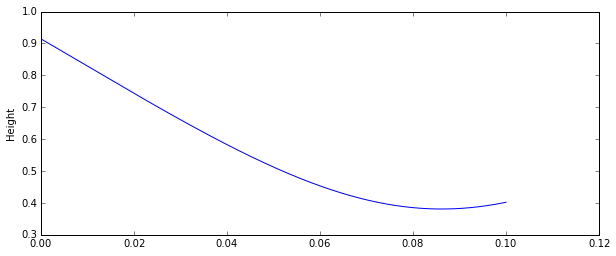

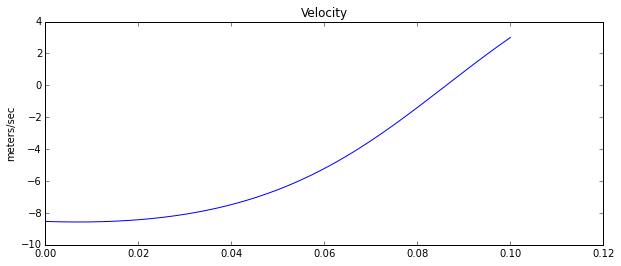

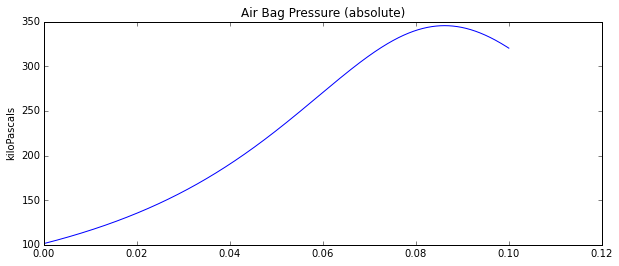

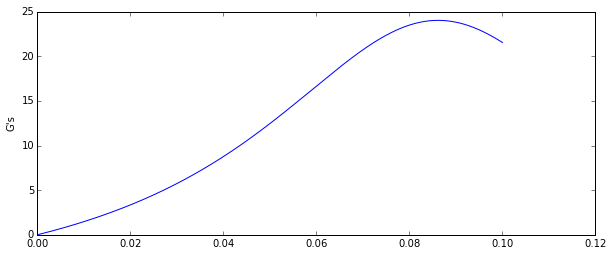

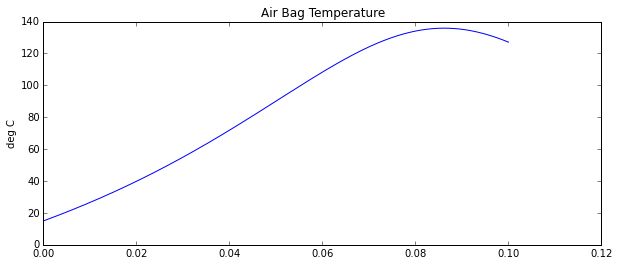

In [164]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.plot(t,h)
plt.ylabel('Height')

plt.figure(figsize=(10,4))
plt.plot(t,v)
plt.title('Velocity')
plt.ylabel('meters/sec')

plt.figure(figsize=(10,4))
plt.plot(t,P.to(ur.kPa))
plt.title('Air Bag Pressure (absolute)')
plt.ylabel('kiloPascals')

# Calculate 

plt.figure(figsize=(10,4))
plt.plot(t,gForce)
plt.ylabel("G's")

plt.figure(figsize=(10,4))
plt.plot(t,T.to(ur.degC))
plt.title('Air Bag Temperature')
plt.ylabel('deg C')

## Collapsing Air Bag Phase

The membrance covering the air bag vent bursts at a pre-determined design pressure $P_{burst}$ after which the air bag enters the 'collapsing phase'.

$$\dot{m} = C A_2 \sqrt{2 \rho_1 P_1 \left(\frac{k}{k-1}\right) \left[\left(\frac{P_2}{P_1}\right)^{\frac{2}{k}} - \left(\frac{P_2}{P_1}\right)^{\frac{k+1}{k}}\right]}$$

gravity =   9.8100 meter / second ** 2
k =   1.4000
area =   0.6567
m_payload = 680.3886 kilogram
P_ambient = 101325.0000 pascal
A_orifice =   0.0015 meter ** 2
m_air =   0.7360 kilogram

Initial Conditions for Initial Compression Phase
h_ic =   0.9144
v_ic =  -8.5344
P_ic = 101369.6


/Users/jeff/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:54: RuntimeWarning: invalid value encountered in sqrt


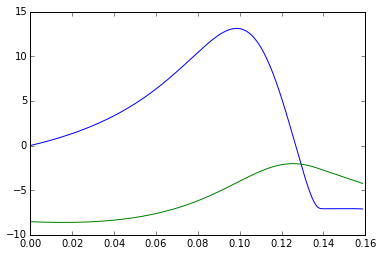

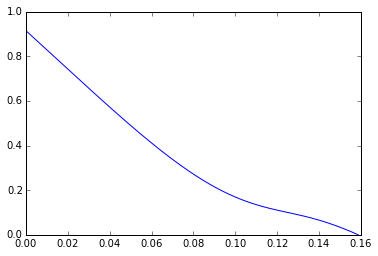

In [223]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Cd = 0.5
A_orifice = 15 * ur.cm**2

# Convert all parameters to base units 
gravity = 9.81 * ur.m/ur.sec**2
k = 1.4
area.ito(ur.m**2)
m_payload.ito(ur.kg)
P_ambient.ito(ur.Pa)
A_orifice.ito(ur.m**2)
m_air.ito(ur.kg)

# Verify parameter values, some of which were calculated above

print "gravity = {0:8.4f}".format(g)
print "k = {0:8.4f}".format(k)
print "area = {0:8.4f}".format(A)
print "m_payload = {0:8.4f}".format(m_payload)
print "P_ambient = {0:8.4f}".format(P_ambient)
print "A_orifice = {0:8.4f}".format(A_orifice)
print "m_air = {0:8.4f}".format(m_air)

# Set and verify initial conditions

h_ic = (height.to(ur.m)).magnitude
v_ic = (-velocity.to(ur.m/ur.sec)).magnitude
P_ic = (P_total.to(ur.Pa)).magnitude
m_ic = m_air.magnitude

x0 = [h_ic, v_ic, P_ic, m_ic]

print "\nInitial Conditions for Initial Compression Phase"
print "h_ic = {0:8.4f}".format(h_ic)
print "v_ic = {0:8.4f}".format(v_ic)
print "P_ic = {0:8.1f}".format(P_ic)

def phase1(x,t):
    h = x[0]
    v = x[1]
    P = x[2]
    m = x[3]

    
    n = m/0.028966
    T = P*h*area.magnitude/(R.magnitude*n)
    Pt = P_ambient.magnitude
    
    mout = 0.8*A_orifice.magnitude*P/(R.magnitude*np.sqrt(T))*(Pt/P)**(1/k)
    mout = mout*np.sqrt(2.0*((k*R.magnitude)/(k-1))*(1-((Pt/P)*((k-1)/k))))
    #print t,T,mout,m
    f0 = v
    f1 = -gravity.magnitude + (P-P_ambient.magnitude)*area.magnitude/m_payload.magnitude
    f2 = -P*k*v/h - (P/m)*mout
    f3 = -mout
    return np.array([f0,f1,f2,f3])

t = np.linspace(0,0.160,1000)
soln = odeint(phase1,x0,t);

h = soln[:,0] * ur.m
v = soln[:,1] * ur.m/ur.sec
P = soln[:,2] * ur.Pa

gForce = (P - P_ambient)*area/m_payload/gravity

Pr = P/P_total.to(ur.Pa)
Tr = Pr**(2.0/7.0)

T = Tr*T_ambient

plt.plot(t,gForce)
plt.plot(t,v)

plt.figure()
plt.plot(t,h)

## Crush Zone Dynamics

We'll assume that a 3 inch crush zone of cardboard honeycomb or other structure is the final cushion for the falling mass. We'll further assume the maximum tolerable de-acceleration rate is 8g. From this data we can determine the maximum permissable velocity of the payload at completion of the air bag phase.

In [160]:
max_accel = 8*g
h_crush = 3.0 * ur.inches

t_crush = np.sqrt(2.0*h_crush/max_accel)
print "Crush Zone Time = {0:8.4f}".format(t_crush.to_base_units())

v_crush = max_accel*t_crush
print "Crush Zone Velocity = {0:8.4f}".format(v_crush.to_base_units())

Crush Zone Time =   0.0441 second
Crush Zone Velocity =   3.4584 meter / second
